# Simple Digit Recognition Model using Neural Networks

### Import all necessary libraries

In [165]:
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Load the MNIST dataset

In [166]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [167]:
print("x_train shape is", x_train.shape)
print("y_train shape is", y_train.shape)
print("x_test shape is", x_test.shape)
print("y_test shape is", y_test.shape)

x_train shape is (60000, 28, 28)
y_train shape is (60000,)
x_test shape is (10000, 28, 28)
y_test shape is (10000,)


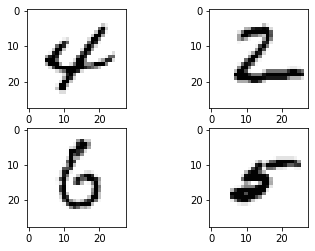

In [168]:
numberOfSamples = x_train.shape[0]

plt.subplot(221)
plt.imshow(x_train[random.randint(0, numberOfSamples)], cmap=plt.get_cmap('Greys'))
plt.subplot(222)
plt.imshow(x_train[random.randint(0, numberOfSamples)], cmap=plt.get_cmap('Greys'))
plt.subplot(223)
plt.imshow(x_train[random.randint(0, numberOfSamples)], cmap=plt.get_cmap('Greys'))
plt.subplot(224)
plt.imshow(x_train[random.randint(0,numberOfSamples)], cmap=plt.get_cmap('Greys'))
plt.show()

### Reshape and normalize data

In [169]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [170]:
print("x_train shape after reshaping is", x_train.shape)
print("x_test shape after reshaping is", x_test.shape)

x_train shape after reshaping is (60000, 28, 28, 1)
x_test shape after reshaping is (10000, 28, 28, 1)


### Create Model

In [171]:
def createModel():
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [172]:
model = createModel()

### Fit and evaluate Model

In [173]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 41s 681us/step - loss: 0.2076 - accuracy: 0.9372 - val_loss: 0.0877 - val_accuracy: 0.9721
Epoch 2/15
60000/60000 [==============================] - 41s 679us/step - loss: 0.0840 - accuracy: 0.9745 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 3/15
60000/60000 [==============================] - 41s 687us/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0720 - val_accuracy: 0.9779
Epoch 4/15
60000/60000 [==============================] - 44s 729us/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.0538 - val_accuracy: 0.9836
Epoch 5/15
60000/60000 [==============================] - 40s 667us/step - loss: 0.0362 - accuracy: 0.9876 - val_loss: 0.0539 - val_accuracy: 0.9832
Epoch 6/15
60000/60000 [==============================] - 40s 667us/step - loss: 0.0305 - accuracy: 0.9896 - val_loss: 0.0636 - val_accuracy: 0.9836
Epoch 7/15
60000/60000 [==============================] 

In [174]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.46%


### Evaluate the model on my own Images

In [219]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

examples = []
for i in range(0,10):
    name = 'MyPictures/' + str(i) + '.png'
    img = plt.imread(name)
    gray = rgb2gray(1 - img)
    examples.append(gray)

In [220]:
examples[0].shape

(28, 28)

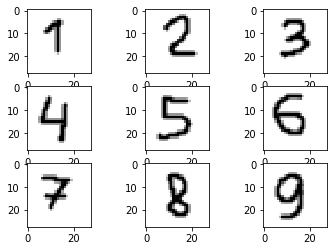

In [221]:
# Examples from 1 to 9
plt.subplot(331)
plt.imshow(examples[1], cmap=plt.get_cmap('Greys'))
plt.subplot(332)
plt.imshow(examples[2], cmap=plt.get_cmap('Greys'))
plt.subplot(333)
plt.imshow(examples[3], cmap=plt.get_cmap('Greys'))
plt.subplot(334)
plt.imshow(examples[4], cmap=plt.get_cmap('Greys'))
plt.subplot(335)
plt.imshow(examples[5], cmap=plt.get_cmap('Greys'))
plt.subplot(336)
plt.imshow(examples[6], cmap=plt.get_cmap('Greys'))
plt.subplot(337)
plt.imshow(examples[7], cmap=plt.get_cmap('Greys'))
plt.subplot(338)
plt.imshow(examples[8], cmap=plt.get_cmap('Greys'))
plt.subplot(339)
plt.imshow(examples[9], cmap=plt.get_cmap('Greys'))
plt.show()

In [222]:
reshapedExamples = []
for ex in examples:
    reshapedImage = ex.reshape(1, 28, 28, 1)
    reshapedExamples.append(reshapedImage)

In [223]:
reshapedExamples[0].shape

(1, 28, 28, 1)

In [227]:
for i in range(0, 10):
    pred = model.predict(reshapedExamples[i].reshape(1,28,28,1))
    print("Expected", i, "predicted", pred.argmax())

Expected 0 predicted 0
Expected 1 predicted 1
Expected 2 predicted 2
Expected 3 predicted 3
Expected 4 predicted 4
Expected 5 predicted 5
Expected 6 predicted 5
Expected 7 predicted 3
Expected 8 predicted 8
Expected 9 predicted 9


### Save the trained model

In [225]:
model.save('my_model.h5')